## STIRLING ENGINE AND HEAT PUMPS

Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Read data file and define variables

In [2]:
filename='data_heat_lab.txt'
data = np.loadtxt(filename,
                  delimiter='\t', 
                  skiprows=2,    
                  dtype=float)    
time = data[:,0]
counts = data[:,1]
th = data[:,2]
tc = data[:,3]

Plot the data with linear fit on th

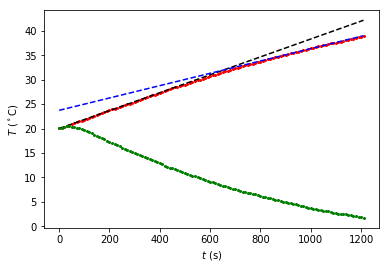

 
0.01831 x + 20
 
0.01262 x + 23.72


In [3]:
fit = np.polyfit(time[0:40],th[0:40],1)
fit_fn = np.poly1d(fit) 
fit2 = np.polyfit(time[80:120],th[80:120],1)
fit_fn2 = np.poly1d(fit2) 

plt.xlabel('$t$ (s)')
plt.ylabel('$T$ ($^\circ$C)')
plt.plot(time,th,'ro', time, fit_fn(time), '--k', time, fit_fn2(time), '--b', markersize=2)
plt.plot(time,tc,'go',markersize=2)
plt.show()
print(fit_fn)
print(fit_fn2)

Calculate the work done W_net

In [4]:
total=0.0
w_net=np.empty([len(counts)])
for i in range(len(counts)):
    total += counts[i]
    w_net[i] = total*4.5
print(w_net)

[  0.    4.5   9.    9.   13.5  13.5  18.   18.   22.5  27.   27.   31.5
  31.5  36.   40.5  40.5  45.   45.   49.5  54.   54.   58.5  63.   63.
  67.5  72.   72.   76.5  81.   81.   85.5  99.   99.  103.5 108.  108.
 117.  121.5 121.5 126.  130.5 130.5 135.  139.5 139.5 144.  148.5 148.5
 153.  157.5 157.5 162.  166.5 166.5 171.  175.5 175.5 180.  184.5 184.5
 189.  193.5 198.  198.  202.5 207.  207.  211.5 216.  216.  220.5 225.
 225.  229.5 234.  234.  238.5 243.  243.  247.5 261.  261.  265.5 270.
 270.  274.5 279.  279.  283.5 288.  288.  292.5 297.  297.  301.5 306.
 306.  310.5 315.  315.  319.5 324.  324.  328.5 342.  342.  346.5 351.
 351.  355.5 360.  360.  364.5 369.  369.  373.5 378.  378.  382.5 387.
 387.  391.5]


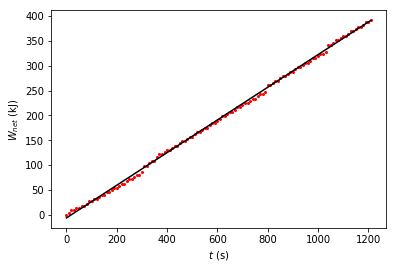

 
0.3284 x - 6.173


In [5]:
fit3 = np.polyfit(time,w_net,1)
fit_fn3 = np.poly1d(fit3) 

plt.xlabel('$t$ (s)')
plt.ylabel('$W_{net}$ (kJ)')
plt.plot(time,w_net,'ro', time, fit_fn3(time), '-k', markersize=2)
plt.show()
print(fit_fn3)


Calculating the Coefficient Of Performance (COP) from dT/dt and dW/dt:

In [6]:
m = 10 #kg
c = 4186 #J/kg*C specific heat of water
del_th_1 = fit_fn[1]*time[40] #(temp. change)=slope*(time interval of 400 seconds)
del_th_2 = fit_fn2[1]*time[40] #time interval is the same for the second linear fit
W_net_1 = fit_fn3[1]*1000*time[40] #translate slope units from kJ/s to J/s by *1000
Q_out_1 = m*c*del_th_1 #Heat transfer
Q_out_2 = m*c*del_th_2

COP_1 = Q_out_1/W_net_1
COP_2 = Q_out_2/W_net_1
print('The coefficient of performance in the first 400 seconds is: ', COP_1, '\nAnd in the last 400 seconds: ', COP_2)

The coefficient of performance in the first 400 seconds is:  2.333671229124626 
And in the last 400 seconds:  1.6087934370077221
